# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharingПризнаки:

1.satisfaction_level​ - Уровень удовлетворенности работой

2.Last_evaluation ​- Время с момента последней оценки в годах

3.number_projects​ - Количество проектов, выполненных за время работы4.average_monthly_hours​ - Среднее количество часов 
на рабочем месте в месяц

5.time_spend_company​ - Стаж работы в компании в годах

6.work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником

7.left​ - уволился ли сотрудник

8.promotion_last_5years​ - повышался ли сотрудник за последние пять лет

9.department ​- отдел в котором работает сотрудник

10.salary​ - относительный уровень зарплаты

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

1. Загрузите файл HR.csv в pandas dataframe

In [2]:
df = pd.read_csv('HR.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [3]:
df[:100]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.51,2,155,3,0,1,0,sales,low
96,0.10,0.77,6,265,4,0,1,0,sales,low
97,0.10,0.84,6,279,4,0,1,0,sales,low
98,0.11,0.97,6,284,4,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Нахождение моды.

In [5]:
df.mode()[:1]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [6]:
corr = df.corr()
print(corr)

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

In [7]:
corr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433


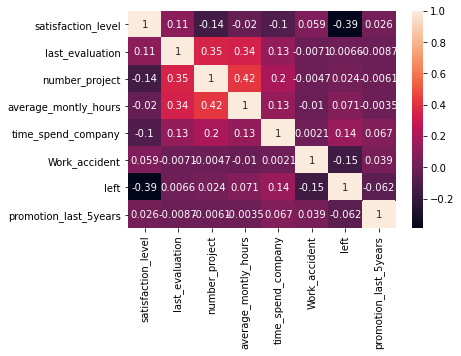

In [8]:
sns.heatmap(corr, annot=True)
plt.show()

- Две самые скоррелированные переменные: number_project, average_montly_hours.

- Две наименее скоррелированные переменные: satisfaction_level, number_project.

4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [9]:
dept_count = df['department'].value_counts()
dept_count[0:]

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

5. Показать распределение сотрудников по зарплатам.

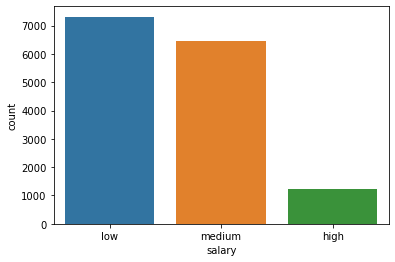

In [10]:
sns.countplot(x='salary', data=df)
plt.show()

6. Показать рапределение сотрудников по зарплатам в каждом департаменте по отдельности

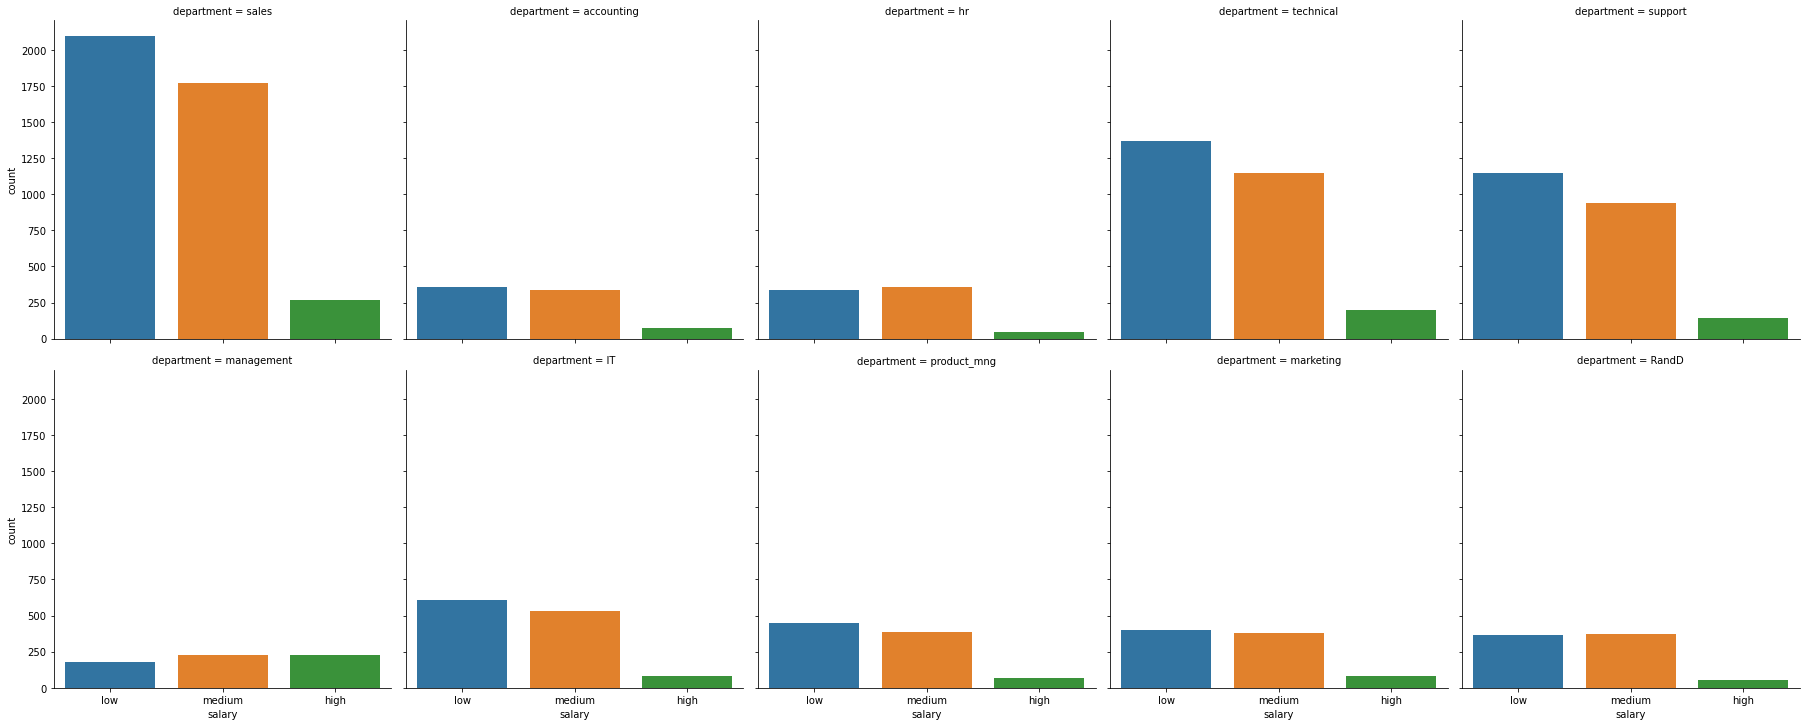

In [11]:
sns.catplot(x='salary', col='department', data=df, kind='count', col_wrap=5)
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [12]:
df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

Гипотеза не подтвердилась. Сотрудники с высокой зарплатой в среднем работают меньше - 199.

8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет

In [13]:
promoted = df['promotion_last_5years'].value_counts()
promoted

0    14680
1      319
Name: promotion_last_5years, dtype: int64

([<matplotlib.patches.Wedge at 0xcdbfb48>,
 [Text(-0.07344249914656216, -1.097545534052737, 'Осталась прежней'),
  Text(0.07344244776674723, 1.0975455374908272, 'Повысилась')],
 [Text(-0.040059544989033906, -0.5986612003924019, '97.9%'),
  Text(0.0400595169636803, 0.5986612022677238, '2.1%')])

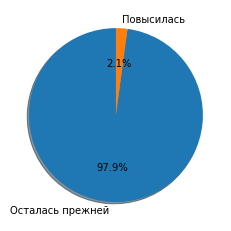

In [14]:
labels = 'Осталась прежней', 'Повысилась', 
plt.pie(promoted,  labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

Повышено было всего лишь 319 сотрудника за последние 5 лет.

In [15]:
total_employee = promoted[0] + promoted[1]
print("Процент сотрудников с повышением от общего числа (ушедшие и оставшиеся): ", promoted[1] / (total_employee) * 100)

Процент сотрудников с повышением от общего числа (ушедшие и оставшиеся):  2.1268084538969263


In [16]:
raised_sal = df.loc[df['promotion_last_5years'] == 1]['left'].value_counts()
raised_sal

0    300
1     19
Name: left, dtype: int64

300 сотрудников, которых повысили еще работают в компании и 19 сотрудников, которых повысили, покинули компанию.

In [17]:
print("Процент сотрудников с повышением от общего числа (оставшиеся в компании): ", raised_sal[0] / (total_employee) * 100)
print("Процент сотрудников с повышением от общего числа (покинувшие компанию): ", raised_sal[1] / (total_employee) * 100)

Процент сотрудников с повышением от общего числа (оставшиеся в компании):  2.000133342222815
Процент сотрудников с повышением от общего числа (покинувшие компанию):  0.1266751116741116


● Средняя степень удовлетворенности

In [18]:
left_company = df.groupby('left')
left_company['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

Уволился = 0. Средняя по удовлетворенности не покинувших компанию сотрудников = 0.666810

Уволился = 1. Средняя по удовлетворенности покинувших компанию сотрудников =  0.440098

● Среднее количество проектов

In [19]:
left_company['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

У покинувших компанию сотрудников среднее количество проектов было выше.

9. Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

Загрузить jupyter notebook с решение на github и прислать ссылку

In [20]:
prognose = df.drop(['salary', 'department'], axis=1)
prognose.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [21]:
prognose['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [22]:
lefted = df['left'].values

Разделение выборки на тренировочную и тестовую.

In [23]:
from sklearn.model_selection import train_test_split
tr_x, tt_x, tr_y, tt_y = train_test_split(prognose, lefted, test_size=0.25)

LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

Обучаем выборку.

In [25]:
lda.fit(tr_x, tr_y)

LinearDiscriminantAnalysis()

Прогноз на тестовой выборке.

In [26]:
lda.predict(tt_x)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [27]:
res = pd.DataFrame([tt_y, lda.predict(tt_x)])
res.head()

,0,1,2,3,4,5,6,7,8,9,...,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
from sklearn.metrics import accuracy_score
perc = accuracy_score(tt_y, lda.predict(tt_x))

print(perc * 100)

76.10666666666667


Качество прогноза модели - 77%. С этой точностью можно предсказать, уволится конкретный сотрудник или нет.

Коэф. дискриминатных линий.

In [29]:
lda.coef_

array([[-4.59436447e+00,  5.91932522e-01, -2.41534473e-01,
         4.52740001e-03,  2.25104675e-01, -1.06847592e+00,
        -0.00000000e+00, -1.07001261e+00]])